Gerard Purtí 1666963
Jordi Viera 1667561

## Introducció

En aquest projecte, treballem amb un conjunt de dades mèdiques que inclou informació recopilada durant exàmens mèdics. L'objectiu principal és desenvolupar un model de predicció capaç de determinar la presència o absència de malaltia cardiovascular en pacients. Aquesta predicció es basarà en tres tipus de característiques:

- Objectiva: Informació factual com l'edat, alçada, pes i sexe.
- D'exploració mèdica: Resultats d'exàmens mèdics com la pressió arterial (sistòlica i diastòlica), nivells de colesterol i glucosa.
- Subjectiva: Informació proporcionada pel pacient, incloent si fuma, consumeix alcohol o realitza activitat física.
  
El conjunt de dades també inclou la variable objectiu, que és binària, indicant si el pacient té o no una malaltia cardiovascular en el moment de l'examen. L'anàlisi d'aquestes dades permetrà construir un model predictiu que pugui ser útil per a la detecció precoç i la millora de la prevenció d'aquest tipus de malalties.

Informació sobre els nostres atributs:

- Age: Edat en dies (variable contínua).
- Height: Alçada en cm (variable contínua).
- Weight: Pes en kg (variable contínua).
- Gender: Sexe (codi categòric).
- Systolic blood pressure (ap_hi): Pressió arterial sistòlica (contínua).
- Diastolic blood pressure (ap_lo): Pressió arterial diastòlica (contínua).
- Cholesterol: Colesterol (1: Normal, 2: Alt, 3: Molt alt).
- Glucose: Glucosa (1: Normal, 2: Alta, 3: Molt alta).
- Smoking: Fumador (0: No, 1: Sí).
- Alcohol intake: Consum d'alcohol (0: No, 1: Sí).
- Physical activity: Activitat física (0: No, 1: Sí).
- Cardio: Presència de malaltia cardiovascular (0: No, 1: Sí).


https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## Anàlisi de les dades

In [1]:
import pandas as pd
# Carregar el dataset
data = pd.read_csv('cardio_train.csv')

# Nans
percentatge_nans = (data.isna().sum() / len(data)) * 100
print("\nPercentatge de valors nuls per columna:\n", percentatge_nans)


Percentatge de valors nuls per columna:
 id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64


Com podem observar no hi ha Nans.

Les variables categòriques del conjunt de dades ja han estat codificades en format numèric, cosa que simplifica el seu ús en models de machine learning:

- Gender: Representada com un codi categòric (valors numèrics).
- Cholesterol i Glucose: Utilitzen valors numèrics (1, 2, 3) per indicar categories com "normal", "per sobre de normal", i "molt per sobre de normal".
- Smoke, Alco i Active: Variables binàries (0 o 1) que indiquen presència o absència de la característica.

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Identificar les variables contínues (variables numèriques excloent els codis categòrics)
continuous_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Normalitzar les variables contínues utilitzant l'escalat Min-Max
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Mostrar les primeres files de les variables contínues normalitzades
data_normalized[continuous_vars].head()


,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.273684,0.016079,0.013550
1,0.730159,0.517949,0.394737,0.017934,0.014453
2,0.624003,0.564103,0.284211,0.017316,0.012647
3,0.528455,0.584615,0.378947,0.018553,0.015357
4,0.516918,0.517949,0.242105,0.015461,0.011743


Les variables contínues del conjunt de dades són age, height, weight, ap_hi, ap_lo. Les hem normalitzat utilitzant el mètode Min-Max Scaling, que ajusta els valors dins d’un rang de [0, 1]. Això permet que totes les variables tinguin la mateixa escala, facilitant el seu ús en models de machine learning que són sensibles a les magnituds dels valors. El resultat s'ha mostrat amb les primeres files de les dades normalitzades.

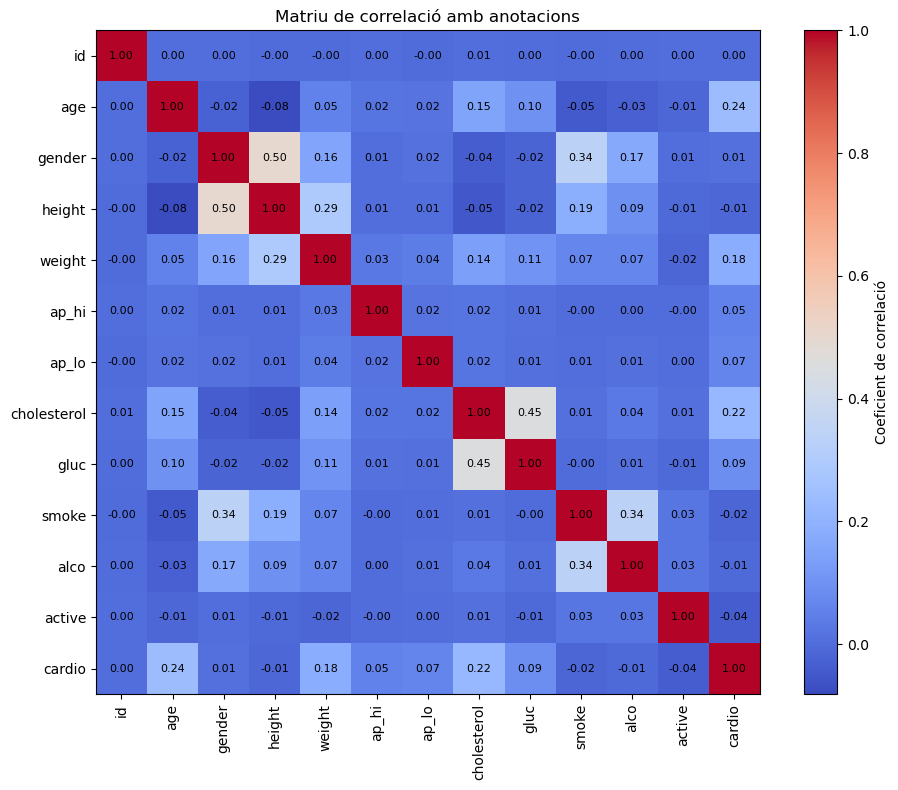

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la matriu de correlació
correlation_matrix = data.corr()

# Crear la matriu de correlació amb anotacions numèriques
plt.figure(figsize=(10, 8))

# Mostrar la matriu com una imatge
im = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

# Afegir una barra de color
plt.colorbar(im, label='Coeficient de correlació')

# Afegir anotacions amb els valors numèrics a cada quadrat
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=8)

# Configurar les etiquetes dels eixos
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Afegir títol i ajustar el disseny
plt.title('Matriu de correlació amb anotacions')
plt.tight_layout()
plt.show()


De la matriu de correlació, es pot observar que la variable cardio (presència de malaltia cardiovascular) té una correlació positiva significativa amb factors com l'edat, el colesterol i la glucosa, indicant que aquests són els principals predictores de risc en aquesta base de dades. 

### Consideracions adicionals

- Aplicar PCA (Anàlisi de Components Principals) en aquest cas no sembla necessari, ja que les variables del conjunt de dades no presenten una correlació tan alta com per justificar la reducció de dimensionalitat.
- Com que les variables actuals tenen una interpretació mèdica clara, no seria necessari aplicar una selecció estricta de features. 

## Selecció de la mètrica

In [4]:
# Comptar les ocurrències de la variable objectiu (cardio) i calcular els percentatges
target_counts = data['cardio'].value_counts(normalize=True) * 100

# Mostrar els resultats al notebook
print("Distribució de la variable objectiu (cardio):")
print(target_counts)


Distribució de la variable objectiu (cardio):
cardio
0    50.03
1    49.97
Name: proportion, dtype: float64


Les dades no estan desbalancejades. La distribució entre les dues classes de la variable objectiu (cardio) és molt equilibrada. Aquest equilibri permet construir models predictius sense necessitat de tècniques especials per tractar el desbalanceig de dades.

L'Accuracy Score és una bona mètrica quan les dades estan equilibrade, mesura el percentatge de prediccions correctes i l'objectiu és tenir una visió general del rendiment del model. Però en el nostre cas, la prioritat hauria de ser minimitzar els falsos negatius, assegurant que totes les persones malaltes siguin detectades, fins i tot si això implica tenir més falsos positius. Això fa que la F1 Score sigui la millor mètrica perquè equilibra la precisió (precision) i l'exhaustivitat (recall), posant especial èmfasi en capturar correctament les persones malaltes. 

In [5]:
def plot_precision_recall_curve(y_true, y_scores):
    """
    Genera y muestra la Precision-Recall Curve.
    
    Args:
    y_true (array-like): Verdaderos valores de las clases.
    y_scores (array-like): Puntajes de probabilidad del modelo para la clase positiva.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='Precision-Recall curve (area = {:.2f})'.format(average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


def plot_roc_curve(y_true, y_scores):
    """
    Genera y muestra la ROC Curve.
    
    Args:
    y_true (array-like): Verdaderos valores de las clases.
    y_scores (array-like): Puntajes de probabilidad del modelo para la clase positiva.
    """
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

Les funcions creades són útils per avaluar el rendiment del model en un context mèdic crític on l'objectiu principal és detectar correctament els casos positius de malaltia cardiovascular. Les utilitzarem en l'últim apartat, després d'haver seleccionat el mètode d'aprenentatge.

Si volem utilitzar el F1-Score com a mètrica principal, la Precision-Recall Curve és la més adequada, ja que mostra la relació directa entre la precisió i el recall, que són les dues components del F1-Score. Aquesta corba permet identificar el llindar òptim per maximitzar el F1-Score, equilibrant precisió i recall. En canvi, la ROC Curve no considera la precisió i, per tant, no és tan útil en aquest context.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer

# Carregar el dataset
train_data = pd.read_csv('cardio_train.csv')
train_data.dropna(inplace=True)
features = train_data.select_dtypes(include=[int, float]).drop(columns='cardio')
target = train_data['cardio']

# Dividir les dades en conjunts de train i test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definir els models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Paràmetres reduïts i menys valors a provar per accelerar
param_grid = {
    'Logistic Regression': {'model__C': [0.1, 1]},
    'Random Forest': {'model__n_estimators': [50, 100]},
    'KNN': {'model__n_neighbors': [3, 5]},
    'SVM': {'model__C': [1, 10], 'model__gamma': [0.01, 0.1]}
}

# Definir el scorer per a f1_score
scorer = make_scorer(f1_score)

results = []

# Bucle sobre els models
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Afegir n_jobs=-1 per paral·lelitzar i cv=3 per menys repeticions
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=3, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring=scorer, n_jobs=-1)
    
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Hyperparameters': grid_search.best_params_,
        'Cross-Validation F1-Score': cv_scores.mean(),
        'Test F1-Score': test_f1,
        'Training Time': grid_search.refit_time_
    })

results_df = pd.DataFrame(results)
display(results_df)

## Preguntes relacionades amb el model selection

1. Quins models heu considerat? Perque els heu seleccionat?

S’han considerat models com la Regressió Logística, el Random Forest, el KNN i l’SVM per tal de cobrir diferents formes de modelització. La seva selecció es justifica perquè permet comparar un enfocament lineal, un basat en ensembles d’arbres, un apropament simple basat en la distància entre punts i un altre centrat en la maximització del marge.

- Logistic Regression és un model lineal senzill que és útil per obtenir una línia base.
- Random Forest és un model potent basat en arbres d'assaig, que pot capturar relacions no lineals i treballar bé amb dades complexes.
- KNN és un mètode senzill basat en distàncies que pot ser útil quan les relacions entre les dades són locals i no lineals.
- SVM és molt eficaç per a problemes amb separació no lineal, especialment amb el kernel RBF.



2.  Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. 


Els hiperparàmetres seleccionats són:

- Logistic Regression: C (controla la regularització).
- Random Forest: n_estimators (nombre d'arbres) i max_depth (profunditat màxima).
- KNN: n_neighbors (nombre de veïns) i weights (mètode per pesar els veïns).
- SVM: C (controla la penalització de les errades) i gamma (controla la forma del kernel).
  


3. Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.


Com que el codi anterior tarda a executar-se, ja que hi ha moltes dades (70.000 files), adjuntem captura dels resultats obtinguts després d'haver executat el codi:

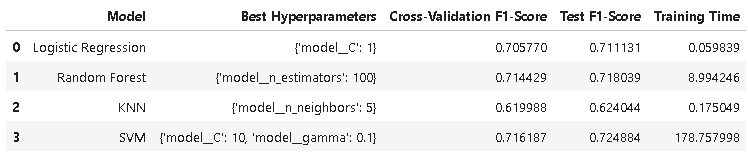


4. Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?


S'ha utilitzat K-fold amb 3 folds per la selecció de models i la cerca d'hiperparàmetres. Aquesta selecció és un bon compromís entre la precisió i el temps d'execució. Un nombre més alt de folds (com 5 o 10) proporcionaria una millor estimació de l'error generalitzat, però també incrementaria el temps d'entrenament. Augmentar el nombre de folds generalment millora la precisió del model, però a costa d'un augment en el temps de càlcul, mentre que reduir-lo acceleraria el procés però amb una possible lleugera pèrdua en l'estimació de la capacitat de generalització.

5. Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?


Hem utilitzat GridSearchCV per buscar els millors hiperparàmetres, que és una tècnica de cerca exhaustiva que prova totes les combinacions possibles de paràmetres. Aquesta tècnica pot ser costosa computacionalment perquè el nombre de proves creix exponencialment amb el nombre de valors possibles per cada hiperparàmetre. Com a alternativa, també existeix RandomizedSearchCV, que prova una mostra aleatòria de les combinacions possibles, reduint el temps de càlcul, però amb una petita pèrdua de precisió. Per aquest conjunt de dades, he seleccionat GridSearchCV perquè la mida del conjunt de dades i l'espai d'hiperparàmetres són suficientment petits per permetre una cerca exhaustiva sense un cost computacional massa alt.


6. Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?


Si el temps és limitat, seria millor utilitzar RandomizedSearchCV amb un conjunt d'hiperparàmetres reduït, ja que pot proporcionar bons resultats més ràpidament en comparació amb GridSearchCV. Això és especialment important en models com Random Forest i SVM, que poden ser molt costosos computacionalment amb una cerca exhaustiva.

7. Existeixen altres mètodes de búsqueda més eficients?

Sí, scikit-optimize és una biblioteca més avançada que utilitza optimització bayesiana per buscar hiperparàmetres de manera més eficient. Aquesta tècnica permet trobar els millors paràmetres amb menys proves en comparació amb la cerca aleatòria o exhaustiva. Si el temps de càlcul és una limitació, utilitzar una tècnica com aquesta pot millorar els resultats de manera més eficient.

Exemple del codi utilitzant scikit-optimize:

In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer

# Importar BayesSearchCV i els tipus d'espai
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real

# Carregar el dataset
train_data = pd.read_csv('cardio_train.csv')
train_data.dropna(inplace=True)
features = train_data.select_dtypes(include=[int, float]).drop(columns='cardio')
target = train_data['cardio']

# Dividir les dades en conjunts de train i test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Definir els models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Definir els espais de cerca per a BayesSearchCV
param_spaces = {
    'Logistic Regression': {
        'model__C': Real(0.1, 1.0, prior='log-uniform') # exemple continu en lloc de valors concrets
    },
    'Random Forest': {
        'model__n_estimators': Integer(50, 100) # rang enter
    },
    'KNN': {
        'model__n_neighbors': Integer(3, 5) # rang enter
    },
    'SVM': {
        'model__C': Real(1, 10, prior='log-uniform'),
        'model__gamma': Real(0.01, 0.1, prior='log-uniform')
    }
}

# Definir el scorer per a f1_score
scorer = make_scorer(f1_score)

results = []

# Bucle sobre els models
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Configurar BayesSearchCV
    # number_of_iterations (n_iter) pot ser ajustat per millorar temps d'execució
    bayes_search = BayesSearchCV(
        estimator=pipeline,
        search_spaces=param_spaces[name],
        scoring=scorer,
        cv=3,
        n_jobs=-1,
        n_iter=10, # nombre d'iteracions de cerca, ajusta segons necessitats
        random_state=42,
        refit=True
    )
    
    bayes_search.fit(X_train, y_train)
    
    best_model = bayes_search.best_estimator_
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=3, scoring=scorer, n_jobs=-1)
    
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Hyperparameters': bayes_search.best_params_,
        'Cross-Validation F1-Score': cv_scores.mean(),
        'Test F1-Score': test_f1,
        'Training Time': bayes_search.refit_time_
    })

results_df = pd.DataFrame(results)
display(results_df)


## Comparació resultats 

Resultats GridSearchCV

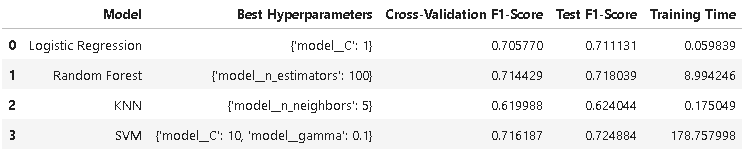

Resultats scikit-optimize

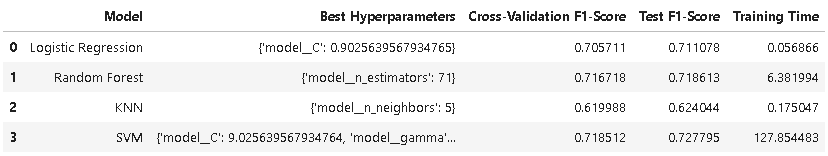

Rendiment similar o lleugerament millor:
Tant amb GridSearchCV com amb BayesSearchCV (scikit-optimize), les mètriques F1 en el conjunt de test són molt semblants. Per exemple, la lògica logística i el KNN mostren gairebé el mateix rendiment final. La Random Forest i l’SVM obtenen resultats lleugerament millors amb scikit-optimize, però la millora és modesta.

Reducció del temps d’execució en alguns casos:
Encara que no sempre és significatiu, l’ús de scikit-optimize pot reduir el temps de computació al no provar totes les combinacions possibles, sinó guiar la cerca cap a les regions més prometedores de l’espai de paràmetres. Això és particularment evident en models més costosos com l’SVM, on el temps d’entrenament s’ha reduït de forma notable.

En conjunt, scikit-optimize ofereix un mètode més eficient i flexible per trobar bons paràmetres, obtenint resultats similars o lleugerament superiors als de GridSearchCV, sovint amb un menor temps de càlcul.

### Anàlisi Final

Les dues tècniques (SVM i Random Forest) tenen resultats de F1 molt similars, però l’SVM necessita molt més temps i recursos per entrenar. El Random Forest, en canvi, arriba gairebé al mateix rendiment amb un cost computacional molt menor, la qual cosa la fa més pràctica i eficient per a l’ús en entorns reals.








Segons els resultats obtinguts, el millor hiperparàmetre per al Random Forest és n_estimators=71.



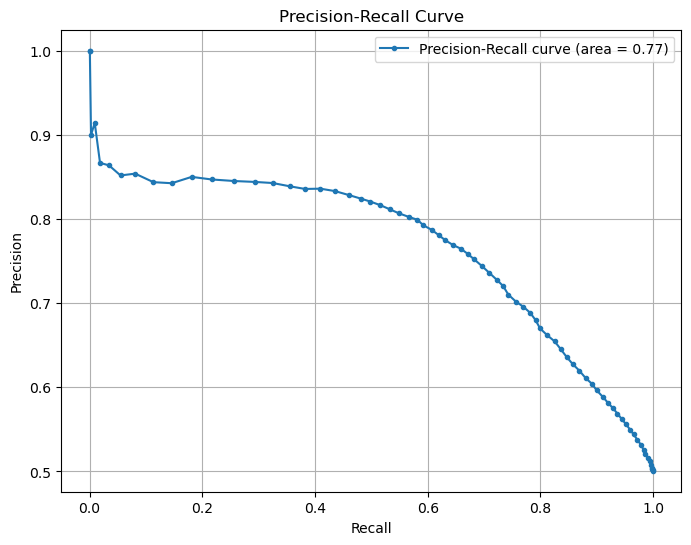

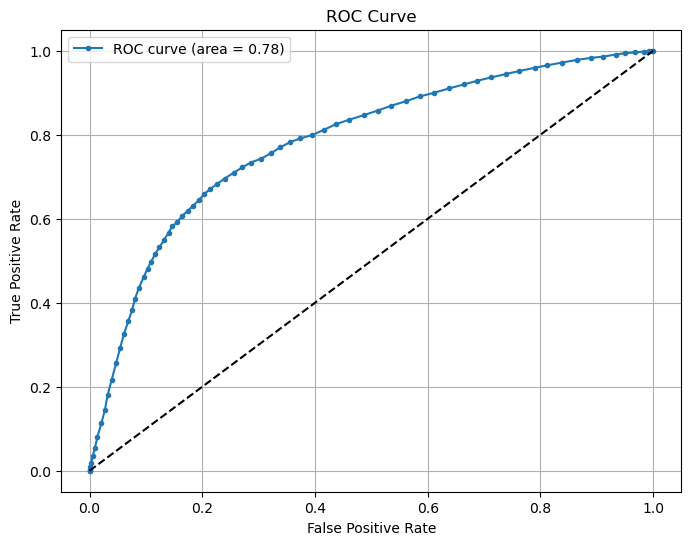

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Carregar el dataset
train_data = pd.read_csv('cardio_train.csv')
train_data.dropna(inplace=True)
features = train_data.select_dtypes(include=[int, float]).drop(columns='cardio')
target = train_data['cardio']

# Dividir les dades en conjunts de train i test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear i entrenar el model Random Forest amb el millor hiperparàmetre trobat
best_rf = RandomForestClassifier(n_estimators=71, random_state=42)
best_rf.fit(X_train, y_train)

y_scores_rf = best_rf.predict_proba(X_test)[:, 1]

plot_precision_recall_curve(y_test, y_scores_rf)
plot_roc_curve(y_test, y_scores_rf)


La corba ROC mostra com de bé el model és capaç de distingir entre les classes positives i negatives a mesura que es varia el llindar de classificació. En aquest cas, l’Àrea Sota la Corba ROC (AUC-ROC) és de 0.78, el que indica un rendiment notablement superior a l’atzar, però encara no excel·lent. El model té certa capacitat per separar correctament casos positius i negatius del dataset, tot i que pot no ser òptim.

La corba de Precisió-Recall (PR) mostra la relació entre la precisió (de les prediccions positives quantes són correctes) i el recall (de les positives totals, quantes n’hem detectat) a diferents llindars. Un AUC-PR de 0.77 és força bo, especialment si la classe positiva és menys freqüent i ens interessa minimitzar falsos positius o bé maximitzar la detecció de positius reals. Una corba PR amb aquesta àrea indica que, per a determinats llindars, es pot aconseguir un balanç raonable entre no perdre massa casos positius i no inflar les prediccions positives amb massa falsos.

En conjunt, aquestes corbes suggereixen que el Random Forest amb n_estimators=71 és un model raonablement bo per al nostre dataset. Té una capacitat discriminant notable i permet, ajustant el llindar, aconseguir un bon equilibri entre trobar tots els casos positius i mantenir un nivell de precisió acceptable. No obstant això, els resultats deixen espai per millorar, ja sigui amb més ajust d’hiperparàmetres, millores al preprocesament de les dades o considerant altres mètodes d’entrenament.

## Conclusions

Els models seleccionats per a l'anàlisi del dataset inclouen la Regressió Logística, el Random Forest, el KNN i l’SVM. Aquests models representen diferents aproximacions metodològiques: enfocaments lineals, basats en arbres de decisió, en distàncies i en marges màxims. Aquesta diversitat ha permès realitzar una comparació completa i robusta per identificar quin model s’adapta millor a les característiques i requeriments del dataset.



El Random Forest ha estat el model amb millor rendiment global, aconseguint un AUC-ROC de 0.78 i un AUC-PR de 0.77 amb n_estimators=71. Això reflecteix una bona capacitat de classificació i un equilibri òptim entre precisió i recall. A més, ofereix un temps d’entrenament raonable, fet que el fa una opció pràctica i eficient per al dataset analitzat. Per la seva banda, l’SVM ha mostrat un rendiment competitiu, però amb un cost computacional més elevat, cosa que el fa menys adequat per a entorns amb recursos limitats.

Les mètriques analitzades, incloent les corbes ROC i PR del Random Forest, indiquen que el model té una bona capacitat discriminant i una efectivitat acceptable en la detecció de casos positius. No obstant això, els resultats també suggereixen que encara hi ha marge de millora, ja sigui mitjançant un ajust més precís dels hiperparàmetres o amb un preprocessament de dades més exhaustiu. Les petites diferències entre l’AUC-ROC (0.78) i l’AUC-PR (0.77) reflecteixen que el model manté un bon balanç entre precisió i recall, fet que el fa adequat per al propòsit del dataset.